    ==============================================================================================

## Importing the DataFrames
- ``` df = pd.read_pickle("file_name.pkl")```  --> create 1 df from a pkl file

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.min_rows", 0) 
pd.set_option("display.max_rows", 30) 
pd.__version__

'1.4.4'

In [198]:
db_qu = pd.read_pickle("clean_Tables\Merged_c.pkl")

In [199]:
db_qu.columns

Index(['ORD_ID', 'ord_CreatDate', 'ord_TotlPaid', 'OL_ID', 'ol_ProdQnty',
       'ol_ProdUntPr', 'ol_ProcessDate', 'PRO_SKU', 'pro_Name', 'pro_Desc',
       'pro_Pr', 'pro_InStock', 'pro_Type'],
      dtype='object')

    ==============================================================================================

## Answer Bussines questions


- Concerns
    A. The main investors pointed out the company’s recent quarterly results showed
        1.  increase in orders placed but a decrease in the total revenue. They prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market.
    B. Questions
        1. How products should be classified into different categories to simplify reports and analysis.
        2. What is the distribution of product prices across different categories.
        3. How many products are being discounted.
        4. How big are the offered discounts as a percentage of the product prices. --> tmp_dis_per

### Discount Variation with Product Types and Time


In [200]:
#drop_list=["ORD_ID","ord_TotlPaid","ol_ProdQnty","ord_CreatDate","OL_ID","ol_ProcessDate","pro_InStock"]

In [204]:
db_qu.loc[db_qu.pro_Type.str.contains("13955395")]

,ORD_ID,ord_CreatDate,ord_TotlPaid,OL_ID,ol_ProdQnty,ol_ProdUntPr,ol_ProcessDate,PRO_SKU,pro_Name,pro_Desc,pro_Pr,pro_InStock,pro_Type
30862,307793,2017-01-12 10:03:01,38.99,1142166,1,35.00,2017-01-12 09:38:14,APP0234,Apple Dock Connector to VGA,Dock Connector to VGA IOS.,35.0,False,13955395
30863,315086,2017-01-26 11:55:06,38.99,1159905,1,35.00,2017-01-26 11:45:35,APP0234,Apple Dock Connector to VGA,Dock Connector to VGA IOS.,35.0,False,13955395
51466,380574,2017-07-21 20:03:12,56.97,1299275,1,24.99,2017-07-21 19:42:16,AP20133,Like new - Adapter Apple Lightning to SD Card ...,Adapter connector Lightning to SD Card Reader,45.0,False,13955395
51467,389475,2017-08-14 17:51:45,31.98,1318039,1,24.99,2017-08-14 17:48:27,AP20133,Like new - Adapter Apple Lightning to SD Card ...,Adapter connector Lightning to SD Card Reader,45.0,False,13955395
51468,393160,2017-08-29 11:43:09,24.99,1325635,1,24.99,2017-08-27 22:23:45,AP20133,Like new - Adapter Apple Lightning to SD Card ...,Adapter connector Lightning to SD Card Reader,45.0,False,13955395
51469,393661,2017-08-28 22:44:48,24.99,1326794,1,24.99,2017-08-28 22:39:24,AP20133,Like new - Adapter Apple Lightning to SD Card ...,Adapter connector Lightning to SD Card Reader,45.0,False,13955395
52511,387131,2017-08-07 17:34:23,418.79,1313156,1,4.99,2017-08-07 16:57:21,AP20124,Like new - Apple iPad Camera Connection Kit,Reconditioned Adapter Compatible digital camer...,35.0,True,13955395
52512,429877,2017-11-21 02:02:32,8.98,1417713,1,4.99,2017-11-21 01:59:21,AP20124,Like new - Apple iPad Camera Connection Kit,Reconditioned Adapter Compatible digital camer...,35.0,True,13955395
52513,439479,2017-11-24 16:51:30,16.27,1438386,1,4.99,2017-11-24 15:27:11,AP20124,Like new - Apple iPad Camera Connection Kit,Reconditioned Adapter Compatible digital camer...,35.0,True,13955395
52514,445084,2017-11-26 12:57:38,13.97,1450916,2,4.99,2017-11-26 12:30:54,AP20124,Like new - Apple iPad Camera Connection Kit,Reconditioned Adapter Compatible digital camer...,35.0,True,13955395


In [125]:
db_qu.head(2)

,ORD_ID,ord_CreatDate,ord_TotlPaid,OL_ID,ol_ProdQnty,ol_ProdUntPr,ol_ProcessDate,PRO_SKU,pro_Name,pro_Desc,pro_Pr,pro_InStock,pro_Type
0,241423,2017-11-06 13:10:02,136.15,1398738,1,129.16,2017-11-06 12:47:20,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,True,11935397
1,269440,2017-01-18 19:15:00,213.98,1151714,1,136.99,2017-01-18 19:12:49,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,True,11935397


In [126]:
import re
def fix_type(row):
    val= row.pro_Type
    if "E" in val:
        m = re.search('^(\d+),(\d+)E\+(\d{2})$', val)
        if m:
            return(m.group(1)+m.group(2))
    else:
        return val

In [127]:
db_qu["pro_Type"] = db_qu.apply(fix_type,axis=1,result_type="expand")

In [128]:
db_qu["pro_Type"] = pd.to_numeric(db_qu.pro_Type)

In [129]:
from collections import Counter
from stop_words import get_stop_words
import nltk
from nltk import corpus

nltk.download('stopwords')
stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(corpus.stopwords.words('english')) #About 150 stopwords
other_words = [" ",",","?","|","/","-"]
stop_words.extend(nltk_words)
stop_words.extend(other_words)
#print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jacqueline\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:

# def common_words(row):
#     text=row.tmp_sumName
#     split_it = text.split()
#     filtered_words = [w for w in split_it if not w in stop_words]
#     #print(filtered_words)
#     counter = Counter(filtered_words)
#     most_occur = counter.most_common(10)
#     return(most_occur)

# #common_words("Hi baby iam here , where are you ?")

In [131]:
# tmp_s=(db_qu
#  .groupby("pro_Type")
#  .agg(tmp_sumName=("pro_Name","sum"))
#  .apply(common_words,axis=1)
#  )

In [132]:

db_proTimDis=round(
    db_qu
    .groupby([db_qu.pro_Type,db_qu.ol_ProcessDate.dt.strftime("%Y-%m")])
    .agg( AvgUnitPrice      =("pro_Pr","mean")
         ,AvgDisUnitPrice   =("ol_ProdUntPr","mean")
         ,NumUniqProducts   =("PRO_SKU",pd.Series.nunique)
         ,NumUniqOrders     =("ORD_ID",pd.Series.nunique)
         ,TotalRevenue      =("ord_TotlPaid","sum")
         ,TotalSoldProdQnty =("ol_ProdQnty","sum")
         ,ProNameSample     =("pro_Name","max")
         ,ProDescSample     =("pro_Desc","max")
         )
    #.nlargest(10,"ol_ProdQnty")
    .reset_index()
)
db_proTimDis= (
    db_proTimDis
    .assign(AvgDiscoutPercent = np.where((db_proTimDis.AvgUnitPrice== 0.0)
                                   ,100
                                   ,round(((db_proTimDis.AvgUnitPrice-db_proTimDis.AvgDisUnitPrice)/db_proTimDis.AvgUnitPrice)*100,2)
                                   ))
    )


In [133]:
db_proTimDis.sample(5)

,pro_Type,ol_ProcessDate,AvgUnitPrice,AvgDisUnitPrice,NumUniqProducts,NumUniqOrders,TotalRevenue,TotalSoldProdQnty,ProNameSample,ProDescSample,AvgDiscoutPercent
382,1424,2017-02,47.0,47.0,2,7,1039.0,7,Transcend External DVD Recorder White,superfine external recorder and portable DVD.,0.00
855,12585395,2017-10,63.0,52.0,52,145,63228.0,174,VM4000 Kensington Mini Display Port Adapter to...,Video Adapter Mini Display to VGA,17.46
1128,21632158,2017-04,4292.0,3953.0,2,2,8328.0,2,Apple Mac Pro 35GHz 6 cores | 64GB RAM | 512GB...,New Mac Pro with 64GB of RAM and two 6-core GP...,7.90
1173,24821716,2017-10,545.0,529.0,6,14,8332.0,14,Apple iPhone 6s 32GB Space Gray,New Free iPhone 6s 128GB.,2.94
1,0,2017-02,519.0,498.0,2,2,995.0,2,Apple iPhone 64GB Silver,New iPhone SE with 4-inch screen 64 free GB.,4.05


In [137]:
db_proTimDis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pro_Type           1405 non-null   int64  
 1   ol_ProcessDate     1405 non-null   object 
 2   AvgUnitPrice       1405 non-null   float64
 3   AvgDisUnitPrice    1405 non-null   float64
 4   NumUniqProducts    1405 non-null   int64  
 5   NumUniqOrders      1405 non-null   int64  
 6   TotalRevenue       1405 non-null   float64
 7   TotalSoldProdQnty  1405 non-null   int64  
 8   ProNameSample      1405 non-null   object 
 9   ProDescSample      1405 non-null   object 
 10  AvgDiscoutPercent  1405 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 120.9+ KB


Compare Q1 2017 with Q1 2018

In [172]:
db_Q18_Rev=(
    db_proTimDis
    .query("ol_ProcessDate.isin(['2018-01','2018-02','2018-03'])")
    .groupby(db_proTimDis.pro_Type)
    .agg(Rev_Per_Type_18=("TotalRevenue","sum"),Dis_Pct_18=("AvgDiscoutPercent","mean"))
    .reset_index()
)

In [173]:
db_Q17_Rev=(
    db_proTimDis
    .query("ol_ProcessDate.isin(['2017-01','2017-02','2017-03'])")
    .groupby(db_proTimDis.pro_Type)
    .agg(Rev_Per_Type_17=("TotalRevenue","sum"),Dis_Pct_17=("AvgDiscoutPercent","mean"))
    .reset_index()
)

In [174]:
db_Q_Rev=db_Q17_Rev.merge(db_Q18_Rev,on="pro_Type" ).sort_values(by="Rev_Per_Type_18",ascending=False)


In [175]:
db_Q_Rev=db_Q_Rev.assign(Rev_diff= db_Q_Rev.Rev_Per_Type_18 - db_Q_Rev.Rev_Per_Type_17)

In [177]:
db_Q_Rev=db_Q_Rev.assign(Dis_Pct_diff= db_Q_Rev.Dis_Pct_18 - db_Q_Rev.Dis_Pct_17)

In [209]:
db_d=db_Q_Rev.nlargest(30,"Rev_diff")

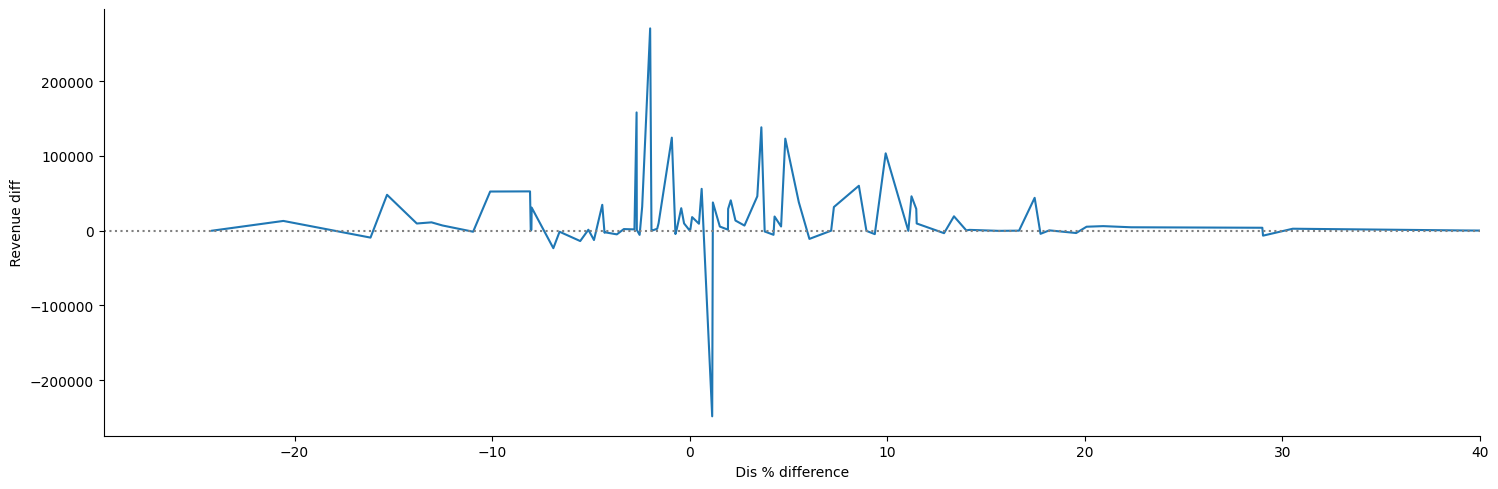

In [222]:
g=sns.relplot(data = db_Q_Rev
            ,kind="line"
            ,x="Dis_Pct_diff"
            ,y="Rev_diff"
            #,hue="pro_Type"
            ,legend=False
            ,aspect=3)
g.set_ylabels(" Revenue diff ")
g.set_xlabels(f" Dis % difference ")
g.set_titles("Difference between Q1 2017 and Q1 2018")
g.ax.set_xlim(xmax=40)
g.ax.hlines(y=0,xmin=-35,xmax=40, color="grey",linestyles="dotted")

In [ ]:
#db_proTimDis.to_csv("test.csv")

In [73]:
round(db_proTimDis.describe())

,pro_Type,AvgUnitPrice,AvgDisUnitPrice,NumUniqProducts,NumUniqOrders,TotalRevenue,TotalSoldProdQnty,AvgDiscoutPercent
count,1405.0,1405.0,1405.0,1405.0,1405.0,1405.0,1405.0,1405.0
mean,15554479.0,412.0,350.0,15.0,41.0,17366.0,49.0,19.0
std,25442208.0,763.0,679.0,25.0,71.0,34626.0,87.0,18.0
min,0.0,6.0,5.0,1.0,1.0,13.0,1.0,-30.0
25%,1404.0,47.0,35.0,2.0,4.0,1005.0,4.0,8.0
50%,11821715.0,114.0,84.0,7.0,14.0,4347.0,15.0,16.0
75%,14305406.0,461.0,387.0,17.0,49.0,17500.0,55.0,26.0
max,118692158.0,6209.0,5571.0,286.0,633.0,424682.0,759.0,91.0


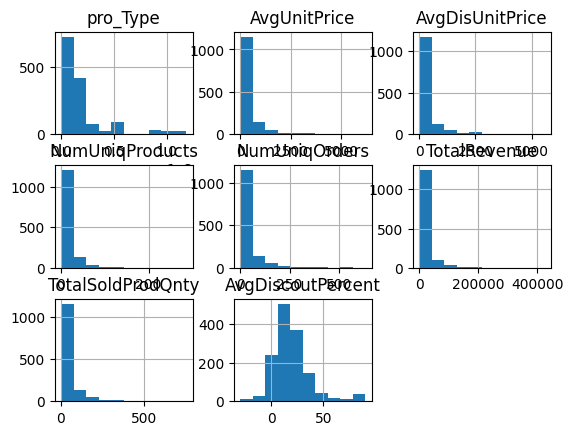

In [74]:
db_proTimDis.hist();

- Get Top Xs

In [ ]:
db_proTimDis.sample(3)

In [ ]:
# df=db_proTimDis.nlargest(10, columns="AvgDiscoutPercent")
# sns.scatterplot(data=df
#                 ,x="ol_ProcessDate"
#                 ,y="AvgDiscoutPercent"
#                 ,hue="pro_Type")

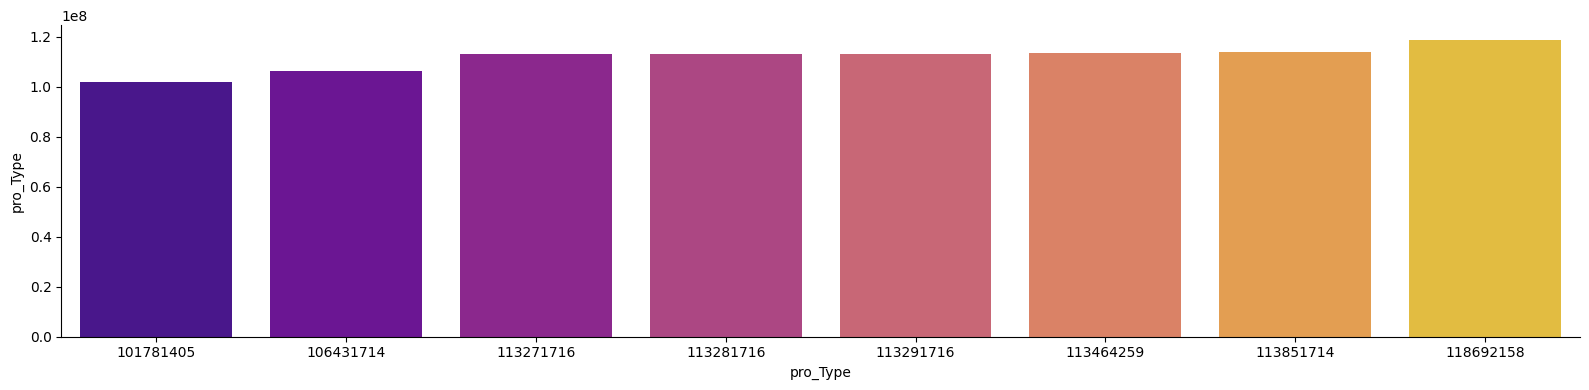

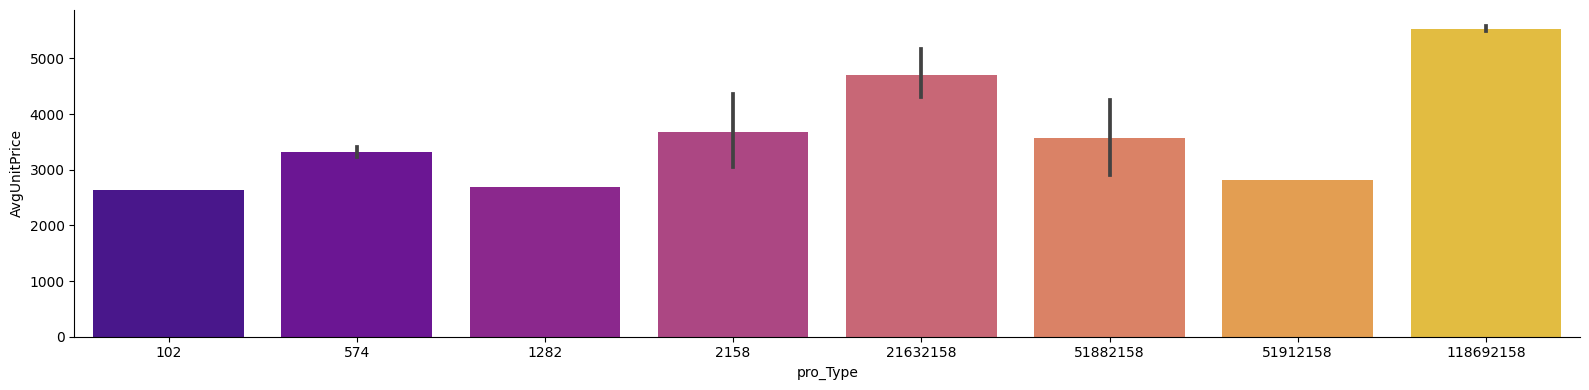

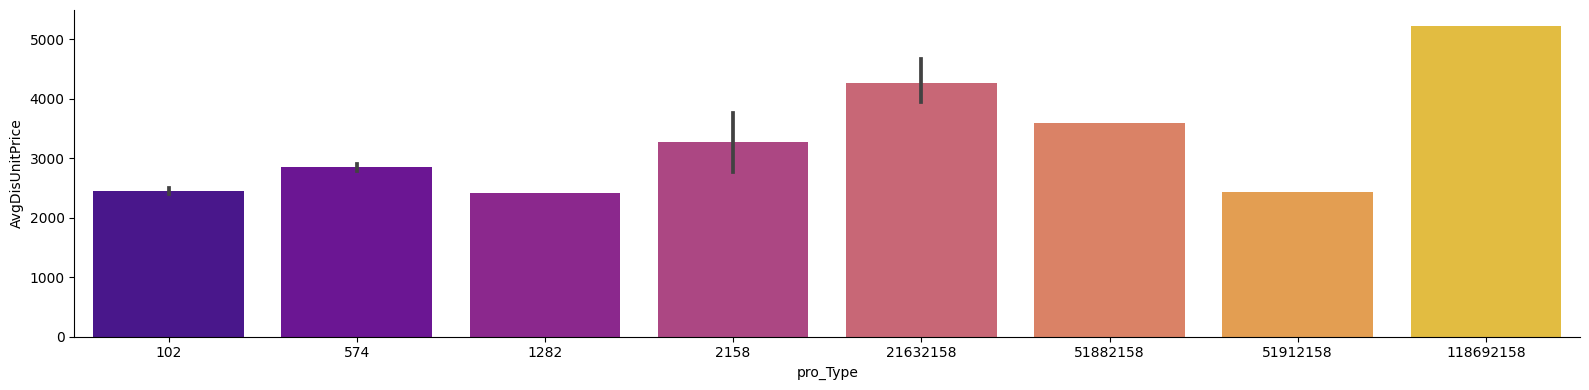

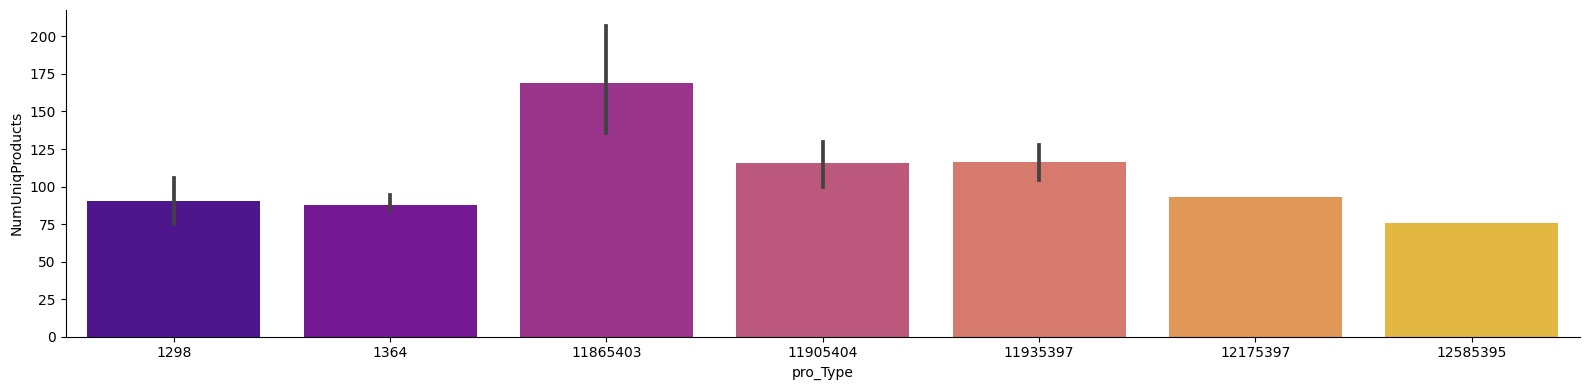

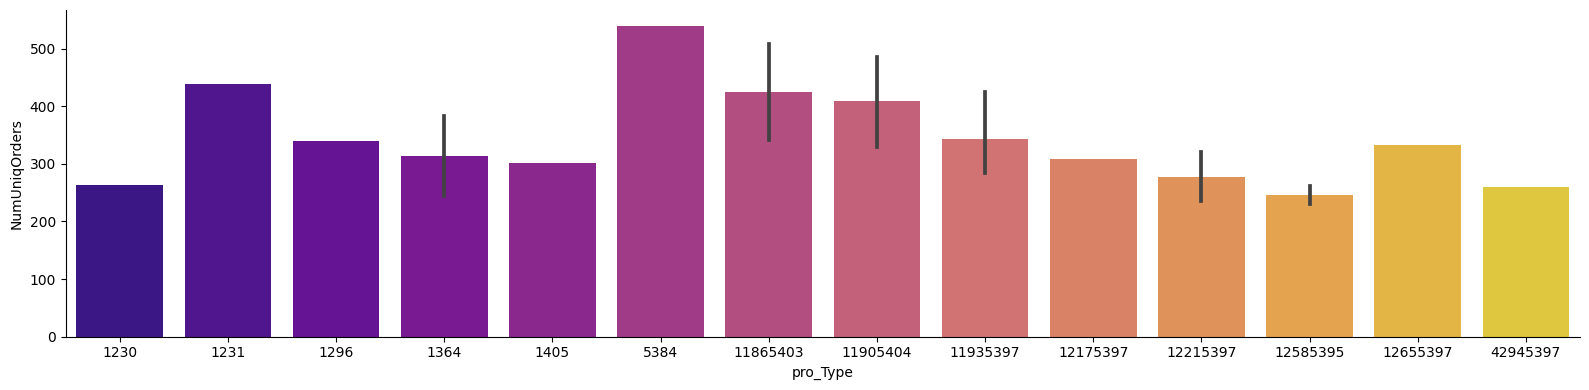

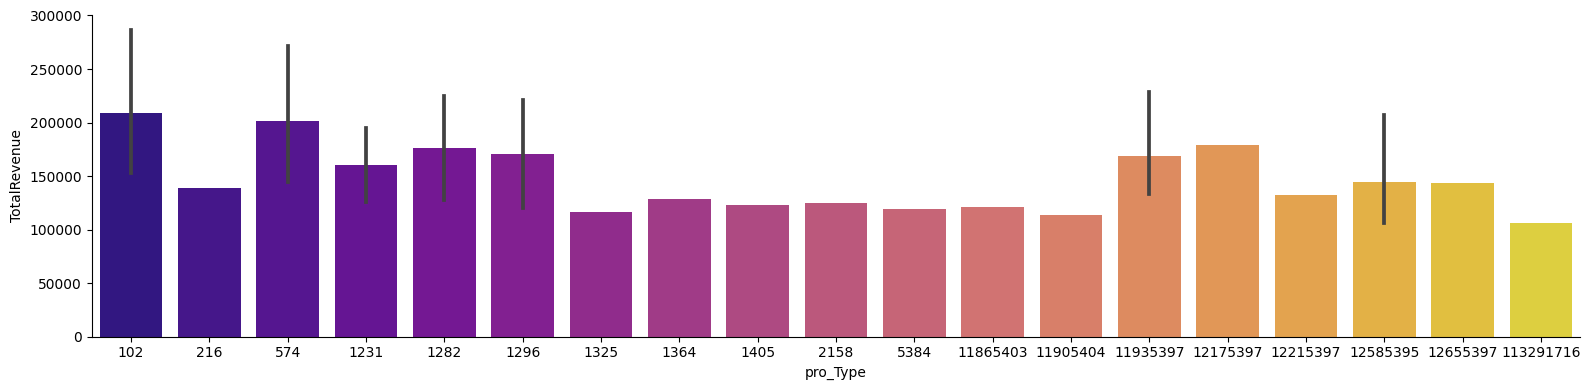

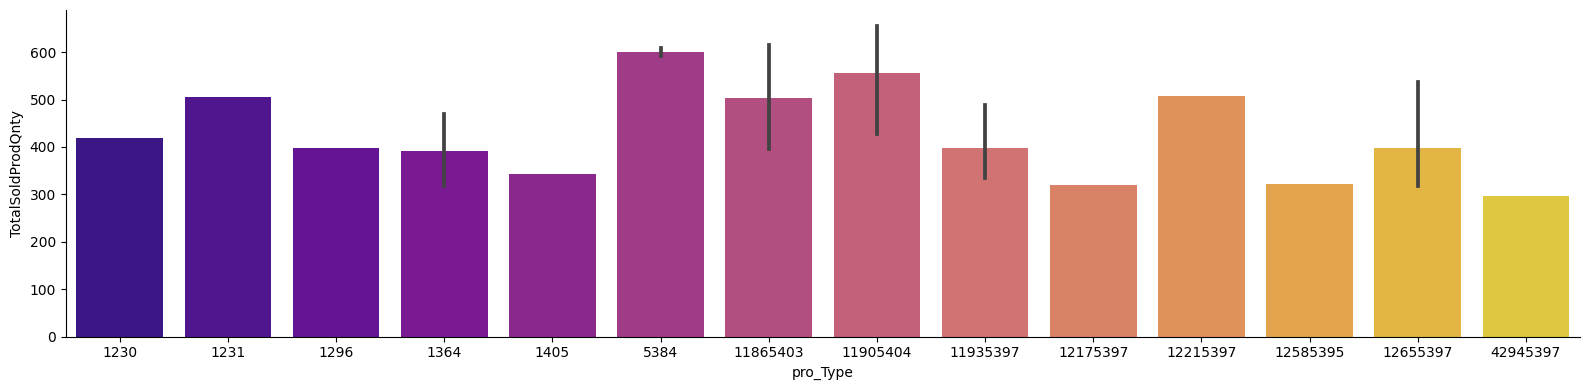

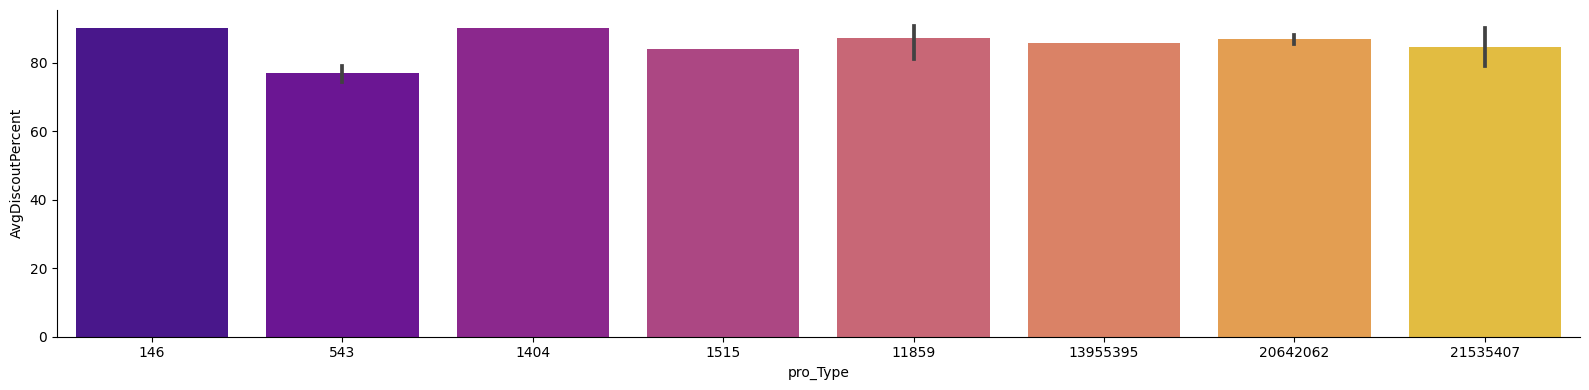

In [120]:
for col in db_proTimDis.columns:
    if (col == "ol_ProcessDate"
    or col == "ProNameSample"
    or col == "ProDescSample"):
        continue
    df=db_proTimDis.nlargest(40, columns=col)
    ordx=db_proTimDis.nlargest(40, columns=col).index
    sns.catplot(data=df
                ,kind="bar"
                ,x="pro_Type"
                ,y=col
                ,legend=False
                ,color="blue"
                ,palette="plasma"
                ,height=4
                ,aspect=4
                #,order=ordx
                )
    #plt.xticks(rotation=90)
    plt.show()

In [ ]:
for col in db_proTimDis.columns:
    if (col == "pro_Type"
    or col == "ol_ProcessDate"
    or col == "ProNameSample"
    or col == "ProDescSample"):
        continue
    df=db_proTimDis.nlargest(40, columns=col)
    ordx=db_proTimDis.nlargest(40, columns=col).index
    sns.catplot(data=df
                ,kind="bar"
                ,x="pro_Type"
                ,y=col
                ,legend=False
                ,color="blue"
                ,palette="plasma"
                ,height=4
                ,aspect=3
                #,order=ordx
                )
    #plt.xticks(rotation=90)
    plt.show()

In [ ]:
# g=sns.relplot(data=db_types
#             ,x="AvgUnitPrice"
#             ,y= "AvgDiscoutPercent"
#             )
sns.relplot(data=db_proTimDis
            ,kind="line"
            ,x="AvgDiscoutPercent"
            ,y="TotalRevenue"
            #,hue="TotalSoldProdQnty"
            #,style="event",
)


In [ ]:
pd.set_option("display.max_colwidth", 5000) 
db_proTimDis.sample(3)